In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Concatenate, Flatten, Add, MaxPooling2D, GlobalAveragePooling2D

In [2]:
gpu_growth = False

if gpu_growth:
    physical_devices = tf.config.list_physical_devices('GPU')
    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
    except:
        # Invalid device or cannot modify virtual devices once initialized.
        pass

## [1] 경로설정 및 git

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
%cd /content/drive/MyDrive/github/DL

/content/drive/MyDrive/github/DL


In [4]:
!git config --global user.email jisy2718@gmail.com
!git config --global user.name jisy2718

In [ ]:
! git add .

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   TF/SequentialAPI_FunctionaAPI.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


## [2] Residual Connection (Skip connection)
residual connection은 특정 layer의 output이 이후의 몇 개 layer를 통과하지 않고, 우회하는 connection입니다. \
`Add()`를 이용하여 합칩니다.


In [6]:
!pip install pydot pydotplus graphviz #then kernel restart

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


`Conv2D` 의 [공식문서](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)입니다. \
filters : Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).

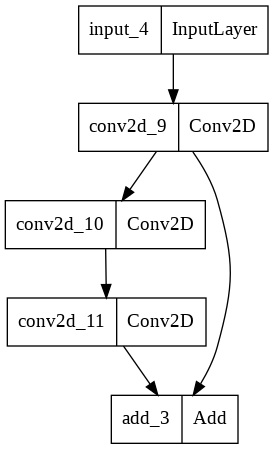

In [10]:
# Residual connection 예시 
inputs = Input(shape=(28,28,1))
x = Conv2D(filters=10, kernel_size=(3,3), padding='same')(inputs)
shortcut = x
x1 = Conv2D(filters=10, kernel_size=(3,3), padding='same')(x)
x1 = Conv2D(filters=10, kernel_size=(3,3), padding='same')(x1)

outputs = Add()([x1, shortcut])
model_res = tf.keras.Model(inputs=inputs, outputs= outputs)

tf.keras.utils.plot_model(model_res)

## [3] Multiple inputs / outputs
+ 특정 layer의 output을 여러 layer가 동시에 input으로 이용하는 것
+ 여러 layer의 output이 하나의 layer의 input으로 들어가는 것도 가능합니다.

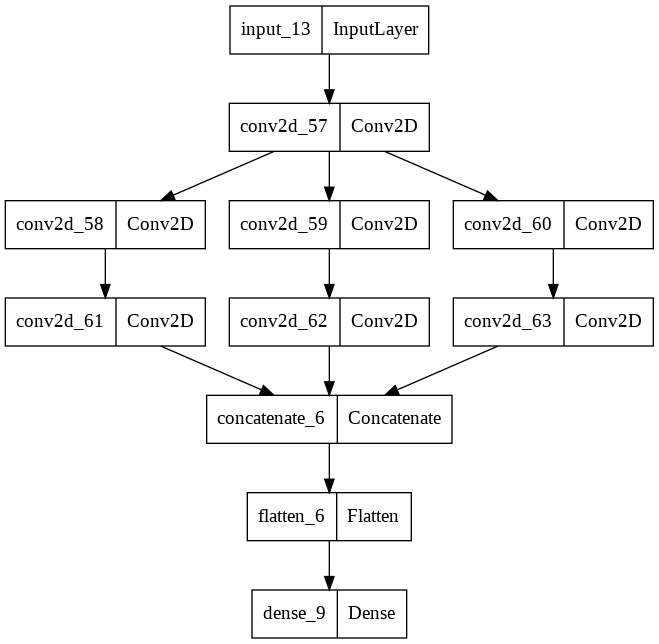

In [25]:
# 다중 input / output 예시
inputs = Input(shape = (28,28,1))
x = Conv2D(filters=10, kernel_size=(3,3), padding='same')(inputs)

x1 = Conv2D(filters=10, kernel_size=(3,3), padding='same')(x)
x2 = Conv2D(filters=10, kernel_size=(3,3), padding='same')(x)
x3 = Conv2D(filters=10, kernel_size=(3,3), padding='same')(x)

x11 = Conv2D(filters=10, kernel_size=(3,3), padding='same')(x1)
x21 = Conv2D(filters=10, kernel_size=(3,3), padding='same')(x2)
x31 = Conv2D(filters=10, kernel_size=(3,3), padding='same')(x3)

x = Concatenate(axis=-1)([x11,x21,x31])      # axis = -1 하면, axis=3와 같음 (가장 안쪽 차원으로 붙이기)  (앞쪽부터 가장 바깥쪽차원이고, axis=k 하면 shape의 k번째 성분이 늘어나도록 붙이는 것)
x = Flatten()(x)
outpus = Dense(10)(x)

model_multi = tf.keras.Model(inputs=inputs, outputs=outpus)
tf.keras.utils.plot_model(model_multi)

In [26]:
model_multi.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_57 (Conv2D)             (None, 28, 28, 10)   100         ['input_13[0][0]']               
                                                                                                  
 conv2d_58 (Conv2D)             (None, 28, 28, 10)   910         ['conv2d_57[0][0]']              
                                                                                                  
 conv2d_59 (Conv2D)             (None, 28, 28, 10)   910         ['conv2d_57[0][0]']              
                                                                                            

## [4] Sharing layer